# **Project: Disease detection from Chest X-Ray**

### **Project Goal:**
Build a deep learning model that can classify chest X-ray images as either Normal or Pneumonia, helping demonstrate how AI can support medical diagnosis.

### **Dataset:**
Chest X-Ray Images (Pneumonia) – Kaggle: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
- 5,863 total images across training, test, and validation folders
- Two classes: NORMAL, PNEUMONIA


### **1. Problem Understanding**

**What are you actually solving?**

- Binary classification: Normal vs Pneumonia

- Input: Chest X-ray images

- Output: A probability or class label

**Key mindset shift:**

- This is decision support, not diagnosis

- False negatives (missing pneumonia) are often more dangerous than false positives



In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [13]:
IMAGE_SIZE = (224, 224)  
BATCH_SIZE = 32

train_images = keras.utils.image_dataset_from_directory(
    'data/train',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    shuffle=True
)

val_images = keras.utils.image_dataset_from_directory(
    'data/val',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    shuffle=False
)

test_images = keras.utils.image_dataset_from_directory(
    'data/test',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    shuffle=False
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


> **label_mode="binary"**

- Because this is Normal vs Pneumonia

- Outputs labels as 0/1

- Matches binary classification loss later

> **shuffle=False** for val/test

- Ensures consistent evaluation

- Prevents confusion matrix mismatches



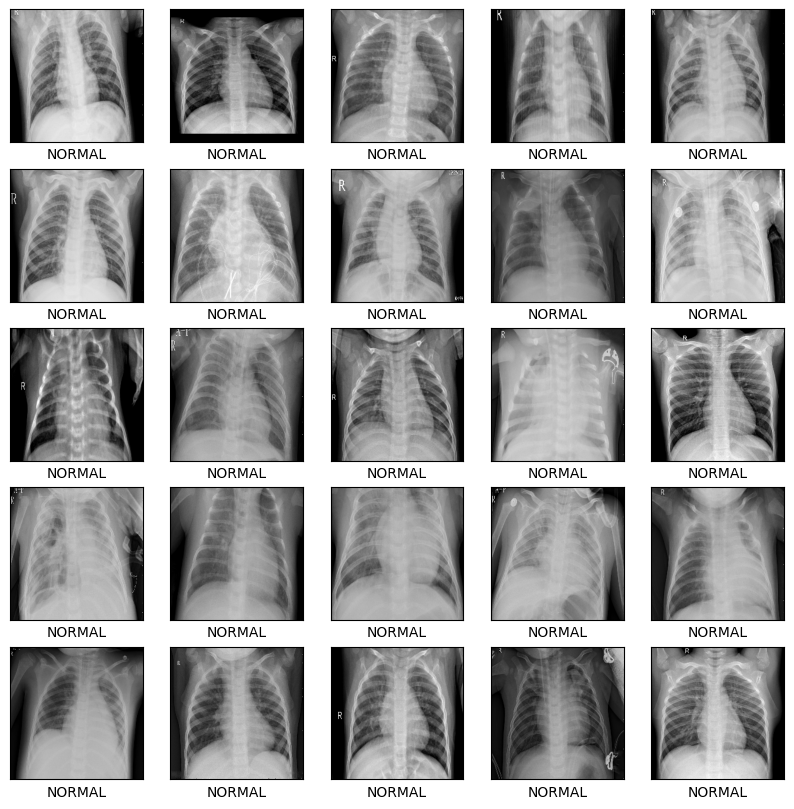

In [29]:
class_names = train_images.class_names

plt.figure(figsize=(10, 10))

for images, labels in train_images.take(1):
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        plt.imshow(images[i].numpy().astype("uint8"))

        label = labels[i]
        if len(label.shape) > 0:  # one-hot or extra dim
            label_index = tf.argmax(label).numpy()
        else:
            label_index = label.numpy()

        plt.xlabel(class_names[label_index])

In [ ]:
# understand the data structure 
for images, labels in train_images.take(1):
    print(images.shape)
    print(labels.shape)

# count the number of NORMAL and PNEUMONIA images in the training set
normal_count = 0
pneumonia_count = 0
for images, labels in train_images:
    normal_count += tf.reduce_sum(tf.cast(labels == 0, tf.int32)).numpy()
    pneumonia_count += tf.reduce_sum(tf.cast(labels == 1, tf.int32)).numpy()
print(f"Total NORMAL images in training set: {normal_count}")
print(f"Total PNEUMONIA images in training set: {pneumonia_count}")


(32, 224, 224, 3)
(32, 1)
Total NORMAL images in training set: 1341
Total PNEUMONIA images in training set: 3875
